In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('iris.csv')
df = df[['sepal.length', 'sepal.width', 'variety']]

In [ ]:
labels = df['variety'].unique()
label_map = {name: idx for idx, name in enumerate(labels)}
df['target'] = df['variety'].map(label_map)

In [ ]:
X = df[['sepal.length', 'sepal.width']].values
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [ ]:
y_pred = [predict(X_train, y_train, x) for x in X_test]
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.67%


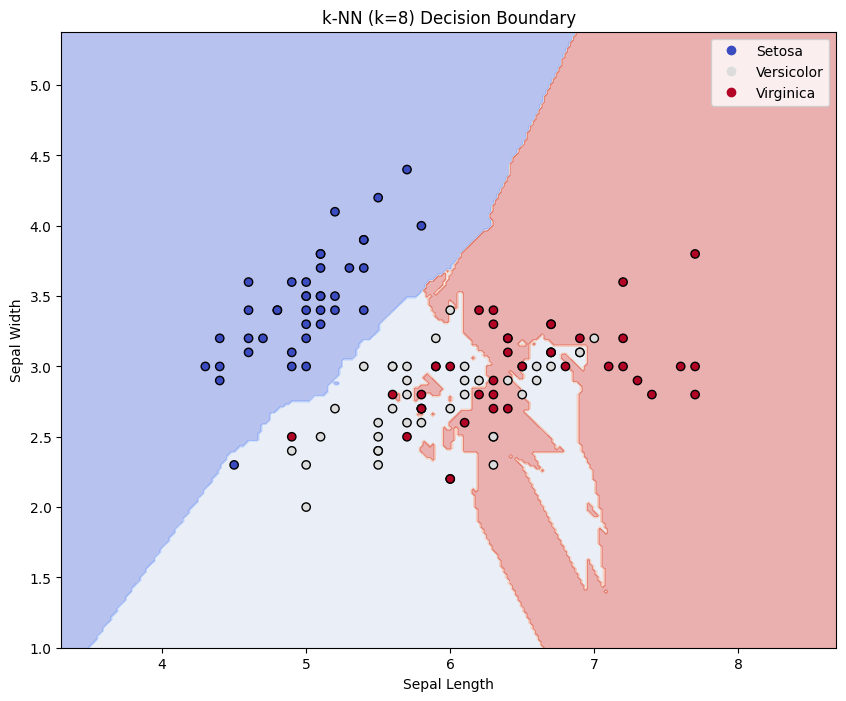

In [ ]:
def plot_decision_boundary(X_train, y_train, k=3):
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.array([predict(X_train, y_train, np.array([x, y]), k)
                  for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(f'k-NN (k={k}) Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], labels=labels.tolist())
    plt.show()

plot_decision_boundary(X_train, y_train, k=8)

In [ ]:
new_point = np.array([5.8, 2.7])

predicted_class = predict(X_train, y_train, new_point, k=3)

predicted_label = labels[predicted_class]

print(f"Predicted variety: {predicted_label}")


Predicted variety: Virginica
